In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, pipeline
from sklearn.preprocessing import PolynomialFeatures

import training_models_helper as tmh
%aimport training_models_helper

tm = tmh.TrainingModelsHelper()

import svm_helper
%aimport svm_helper
svmh = svm_helper.SVM_Helper()

kn = tmh.KNN_Helper()

import transform_helper
%aimport transform_helper

th = transform_helper.Transformation_Helper()

iph = transform_helper.InfluentialPoints_Helper()

import svm_helper
%aimport svm_helper
svmh = svm_helper.SVM_Helper()

import class_helper
%aimport class_helper

import recipe_helper
%aimport recipe_helper


# Transformations

The Regression and Classification models we presented were based on the linear relationship
$$
\y = \Theta^T \cdot \x
$$

But it is often the case that the *raw* examples $\langle \X, \y \rangle$ *don't* exhibit a linear relationship.

When this happens
- We need to *transform* the examples
- To induce a linear relationship

There are many *other* reasons that necessitate transforming examples.

In this brief introduction, we will focus on linearity-inducing transformations.

Transformations/Feature Engineering may be *the most crucial* step in Classical Machine Learning.
- transforming features
- adding features
- transforming targets
all in the service of finding good predictors

Once we study Deep Learning, we will see how Neural Nets "learn" transformations that are useful.

# Transforming features: inducing linearity

Many models for Regression and Classification are
based on *linear* relationships between targets and features.

One of the main uses for tranformations is to create linearity where it does not
naturally exist in the raw examples.

Consider what happens if you try to fit a linear relationship
- Between target "Price Premium"
- And the single feature "Price"

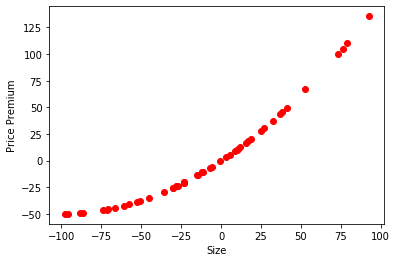

In [4]:
(xlabel, ylabel) = ("Size", "Price Premium")

# I will give you the data via a function (so I can easily alter the data in subsequent examples)
v1, a1 = 1, .005
lin = recipe_helper.Recipe_Helper(v = v1, a = a1)
X_lin, y_lin = lin.gen_data(num=50)

v2, a2 = v1, a1*2
curv = recipe_helper.Recipe_Helper(v = v2, a = a2)
X_curve, y_curve = curv.gen_data(num=50)
_= curv.gen_plot(X_curve,y_curve, xlabel, ylabel)

Coefficients: 
 [9.86448852] [[0.93673892]]


R-squared (test): 0.91
Root Mean squared error (test): 13.73


R-squared (train): 0.91
Root Mean squared error (train): 13.13


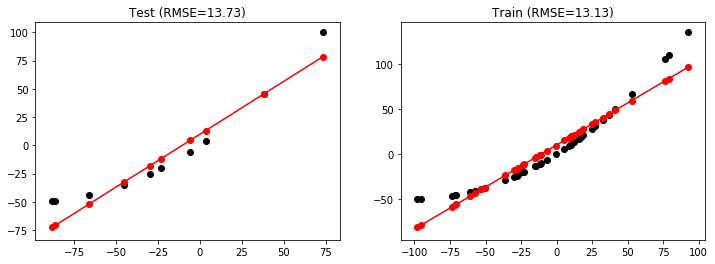

In [5]:
_= curv.run_regress(X_curve, y_curve)


Our (first-order) linear model is inadequate:

$$ y = \Theta_0 + \Theta_1  x $$

We can create a *second order* linear model by adding a feature $x^2$:

$$ y = \Theta_0 + \Theta_1  x + \Theta_2  x^2$$

$y$ is a second order polynomial, whose plot is a curve
- but it is linear in features $x, x^2$

Let's modify $\x^\ip$ from a vector of length 1:

$$
\x^\ip = (\x^\ip_1)
$$

to a vector of length 2:

$$
\x^\ip = (\x^\ip_1, {\x^\ip_1}^2)
$$

by adding a squared term to the vector $\x^\ip$, for each $i$.

The modified $\X'$ becomes:

$$
\X =
\begin{pmatrix}
  1  &\x^{(1)}_1   &  (\x^{(1)}_1)^2 \\ 
   1 &\x^{(2)}_1   &  (\x^{(2)}_1)^2\\ 
   \vdots & \vdots &                \\
   1 &\x^{(m)}_1   &  (\x^{(m)}_1)^2\ \
  \end{pmatrix}
$$

Note that this modified $\X'$ fits perfectly within our Linear hypothesis
$$
\hat{\y} = \X' \Theta
$$

The requirement is that the model be linear in its *features*, **not** that the features be linear !

Let's fit the linear second order model:

Coefficients: 
 [-3.55271368e-15] [[1.    0.005]]


R-squared (test): 1.00
Root Mean squared error (test): 0.00


R-squared (train): 1.00
Root Mean squared error (train): 0.00


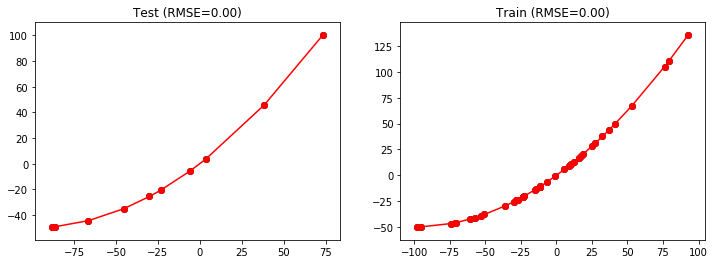

In [6]:
_= curv.run_regress(X_curve, y_curve, run_transforms=True)

Perfect fit.

In this case, the transformation we performed
- Was adding a second feature

Let's explore other cases where transformations are needed.

Consider the following binary classification task.
- Classify the following single-feature examples
- Target class indicated by color


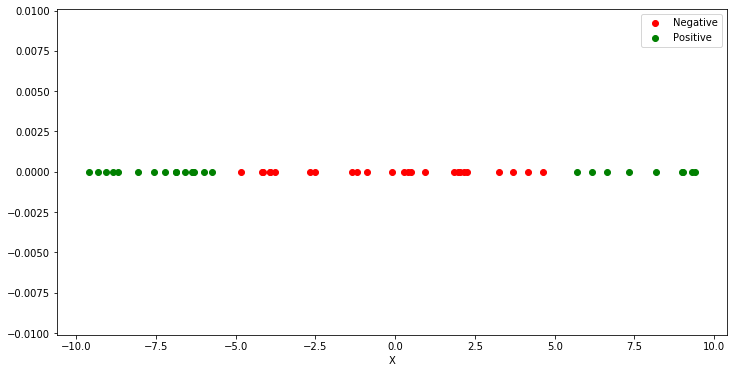

In [7]:
th = transform_helper.Transformation_Helper()
fig_raw, ax_raw, fig_trans, ax_trans = th.LinearSeparate_1d_example(max_val=10, num_examples=50, visible=False)

fig_raw

Clearly there is no linear separating boundary.

The transformation that replaces the single feature $\x_1$ with $\x_1^2$
achieves linear separability.

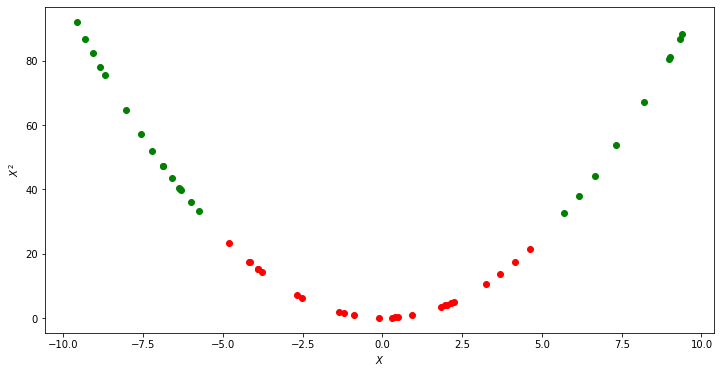

In [8]:
fig_trans

# Transforming targets to induce a linear relationship

As we saw in our module on Binary Classification:
- discrete values are not fit well by a linear model

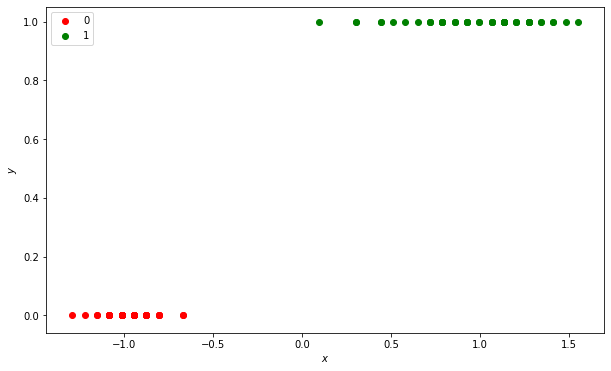

In [9]:
lsh = class_helper.LinearSep_Helper()
X_ls, y_ls = lsh.load_iris()

fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot_y_vs_x(ax, X_ls[:,0], y_ls)


The functional form of a sigmoid is a much better match

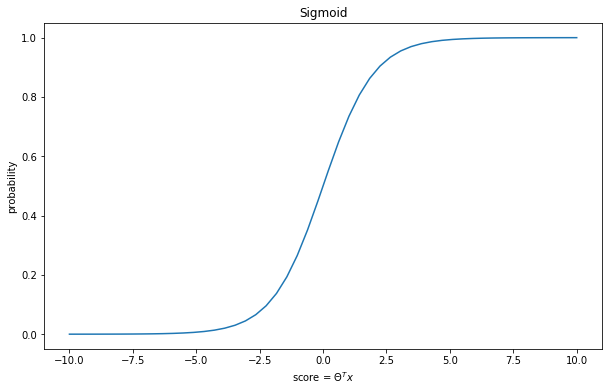

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
_= lsh.plot_sigmoid(ax)

If we transform the probability into log odds, we make the targets linear in the features.

In [11]:
s = np.linspace(-10,10, 50)
sigma_s = 1/(1 + np.exp(- s))

p = sigma_s
eps = 1e-8

log_odds = np.log(p/(1 -p + eps))

fig, axs = plt.subplots(1,2, figsize=(12,6))

_= axs[0].plot(p)
_= axs[0].set_xlabel("score")
_= axs[0].set_ylabel("probability p")

_= axs[1].plot(log_odds)
_= axs[1].set_xlabel("score")
_= axs[1].set_ylabel("log odds")

fig.tight_layout()
plt.close(fig)

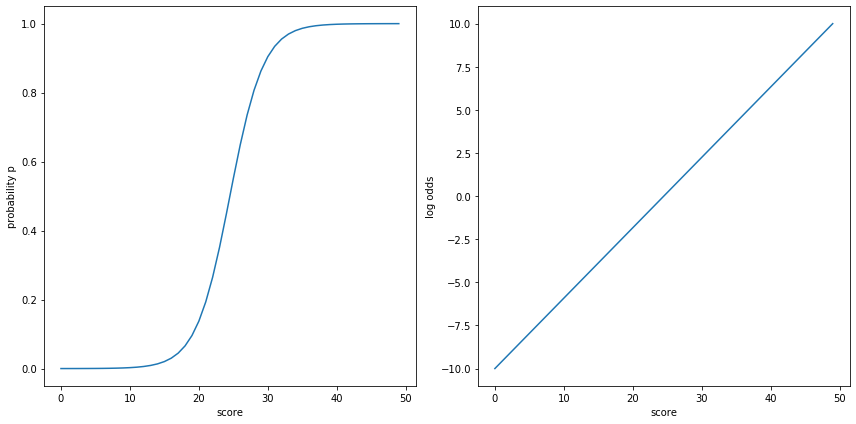

In [12]:
fig

# Non-linear transformation + Linear Classifier = Non-linear boundary

To see the power of transformations, consider a transformation to induce linear separability.

After running this transformation, let's run a binary Linear Classifier and plot the boundary separating classes:

In [13]:
svmh = svm_helper.SVM_Helper()

_= svmh.create_kernel_data()

gamma=1
C=0.1

linear_kernel_svm = svm.SVC(kernel="linear", gamma=gamma)

# Pipelines
feature_map_poly2 = PolynomialFeatures(2)
poly2_approx = pipeline.Pipeline( [ ("feature map", feature_map_poly2),
                                    ("svm", svm.LinearSVC())                 
                                  ])

classifiers =  [ ("SVC", linear_kernel_svm),
                ("poly (d=2) transform + SVC", poly2_approx)
               ]
_= svmh.create_kernel_data(classifiers=classifiers)      
fig, axs = svmh.plot_kernel_vs_transform()
plt.close()

/home/kjp/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


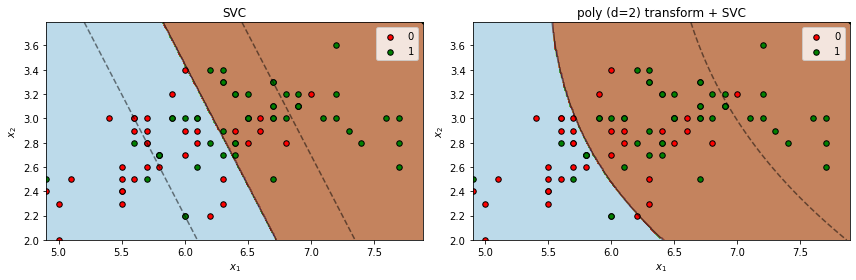

In [14]:
fig

The boundary on the right is no longer linear in the original featues !

It **is** linear in the *transformed* features.

Thus, transformations are one way to create non-linear separating boundaries.

# Transformation to add a "missing"numeric feature

Sometimes our models can't fit the data because some key feature is missing.

This was the case for our "curvy" data and Linear model: the polynomial term was missing.



Let's see another example of a missing feature.

Many classifiers attempt to create a linear boundary separating classes.

If the raw data is not linearly separable, sometimes adding a feature will make it so.

Here's a set of examples from two classes (Positive/Negative) that are not inearly separable.

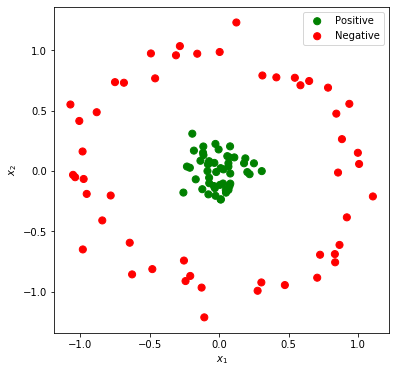

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,6) )
Xc, yc = svmh.make_circles(ax=ax, plot=True)

Consider adding a third feature

$$ 
x_3 = - \sum_j { \x_j^2 } 
$$

That is: the (negative) of the L2 distance.


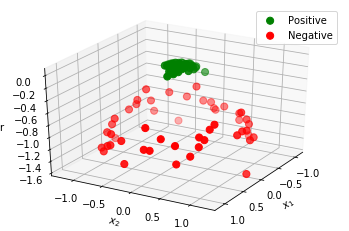

In [16]:
X_w_rad = svmh.circles_radius_transform(Xc)
_= svmh.plot_3D(X=X_w_rad, y=yc )

Although this transformation seems magical, we must be skeptical of magic
- There should be some *logical* justification for the added feature
- Without some logic: we are in danger of overfitting and will fail to generalize to test examples

For example:
- Perhaps $\x_1, \x_2$ are geographic coordinates (latitude/longitude)
- There is a distinction (different classes) based on distance from the city center
    - urban/suburban


In [17]:
print("Done")

Done
